Tutorial for using trackpy:
http://soft-matter.github.io/trackpy/v0.3.0/tutorial/walkthrough.html

In [53]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# the following line only works in an IPython notebook
%matplotlib notebook

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 6))
mpl.rc('image', cmap='gray')

In [54]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

from skimage import filters

In [55]:
frames = pims.ImageSequence('../data/huganir/tp*_results0001.tif', as_grey=True)

Original (base) Image we do detection on

<IPython.core.display.Javascript object>


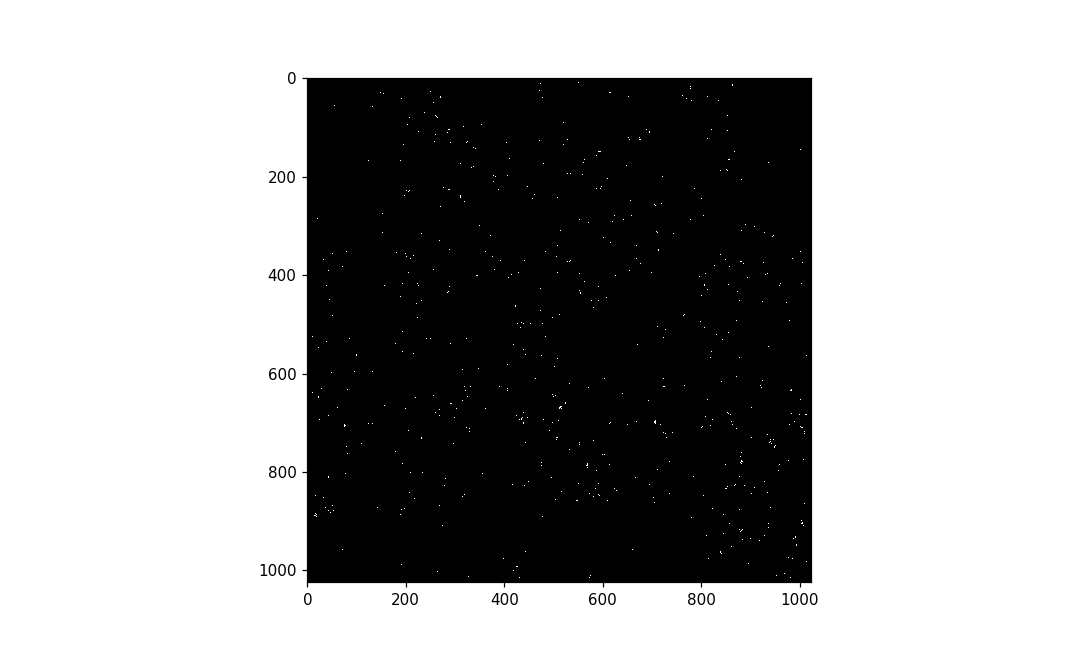

In [56]:
tp1 = pims.open('../data/R04_t001.tif')
background = tp1[1].clip(-2500, 10000)
plt.imshow(background)

Predicted Synapses from PLoS - threshold 0.9

In [57]:
thresh = filters.threshold_otsu(frames[0])
plt.imshow(np.array(frames[0]) > thresh)

In [58]:
thresh = filters.threshold_otsu(frames[1])
plt.imshow(np.array(frames[1]) > thresh)

Detecting "features" in the predicted synapses. Second argument is estimated size of features in pixels

In [59]:
f = tp.locate(frames[1], 7, percentile=0.95)
#detect features

In [60]:
f.head(10) # shows the first few rows of data

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
1,9.000000,902.000000,867.621009,1.025227,0.299290,199.855670,1438.0,0.0,1
2,11.448216,474.000000,3535.703985,1.344999,0.049888,530.738222,7195.0,0.0,1
3,13.788933,864.562931,5854.338465,1.573161,0.167871,631.676966,12960.0,0.0,1
4,14.999900,550.000000,870.229807,1.025786,0.298987,200.333950,1441.0,0.0,1
5,16.000000,251.000000,871.121146,1.025894,0.298950,200.486129,1442.0,0.0,1
6,16.000000,639.000000,48.001884,1.642671,0.518191,4.739316,60.0,0.0,1
7,18.000000,65.000000,872.838605,1.026244,0.298816,200.812229,1444.0,0.0,1
8,17.995435,228.000273,876.208302,1.029211,0.294932,201.007889,1455.0,0.0,1
9,18.000000,572.000000,874.556063,1.026544,0.298683,201.138329,1446.0,0.0,1
10,20.231898,265.286967,2996.748050,1.275611,0.365140,477.366562,5788.0,0.0,1


<IPython.core.display.Javascript object>


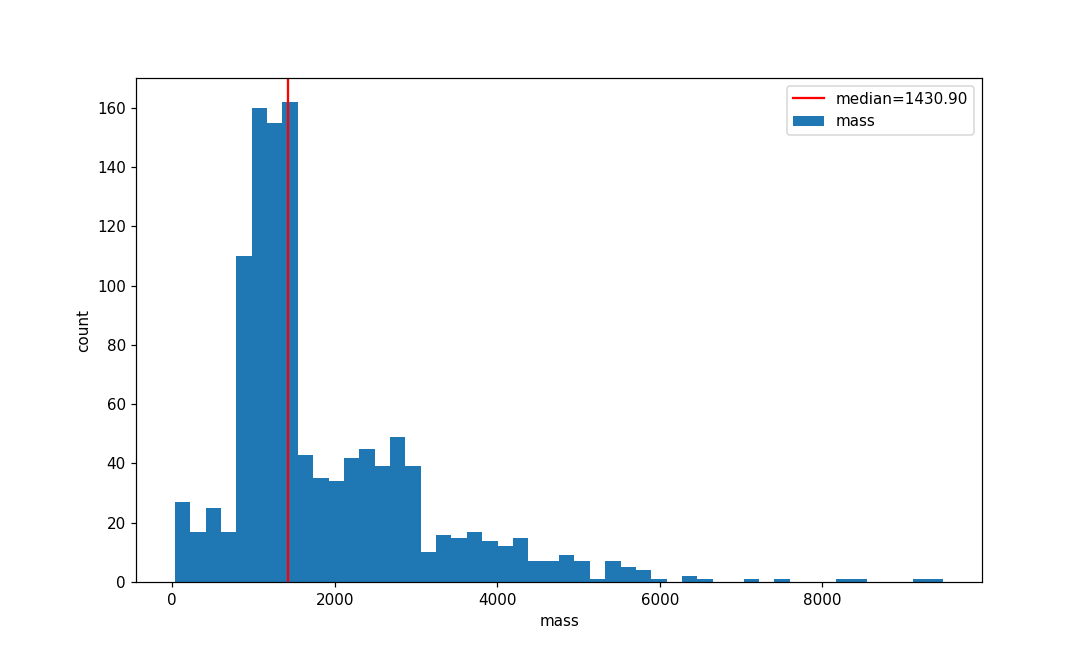

In [61]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=50)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count')
plt.axvline(x=np.median(f['mass']), color='red', label='median={:.2f}'.format(np.median(f['mass'])))
plt.legend()

In [68]:
f = tp.locate(frames[1], 7, percentile=0.95)
f = tp.locate(frames[1], 7, minmass=np.median(f['mass']), percentile=0.95)

<IPython.core.display.Javascript object>


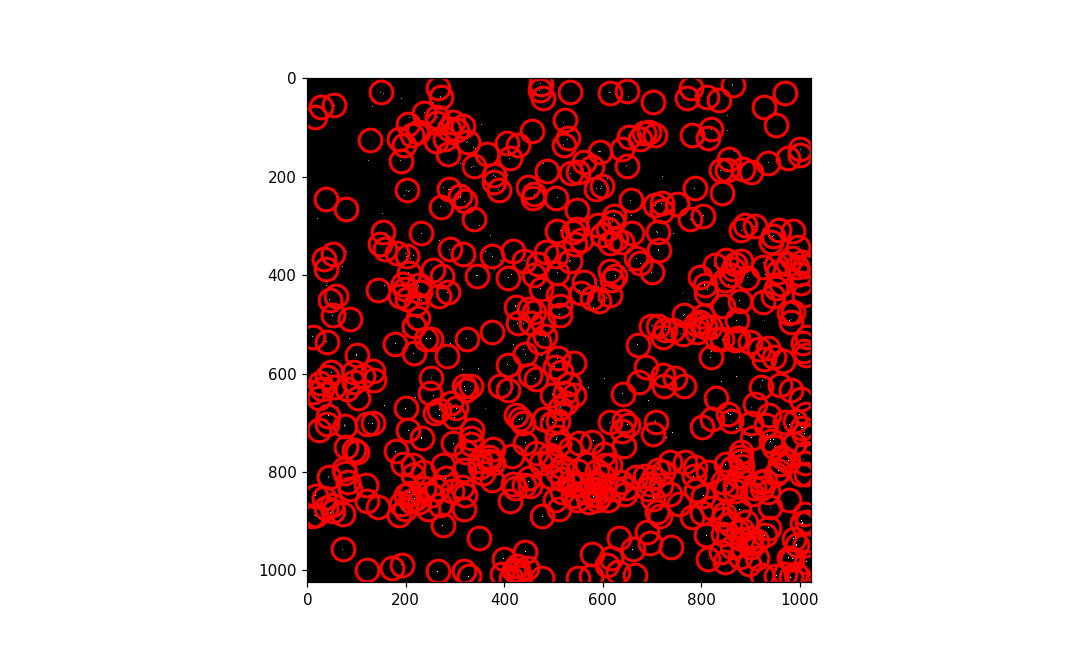

In [69]:
plt.figure()
tp.annotate(f, frames[1])

<IPython.core.display.Javascript object>


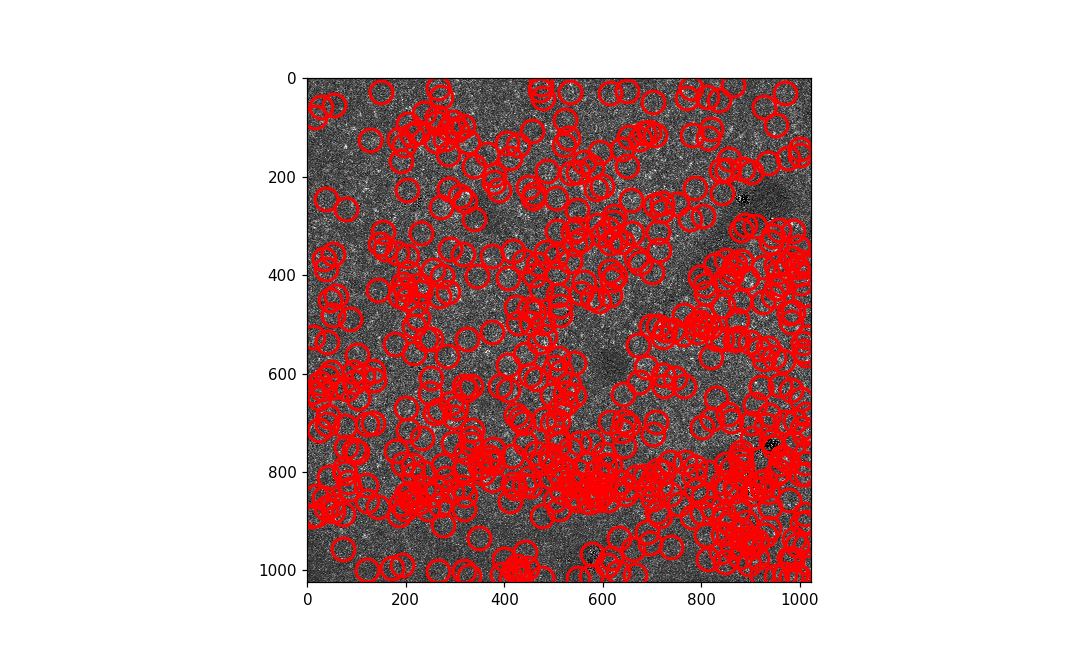

In [73]:
plt.figure()
tp.annotate(f, background)

<IPython.core.display.Javascript object>


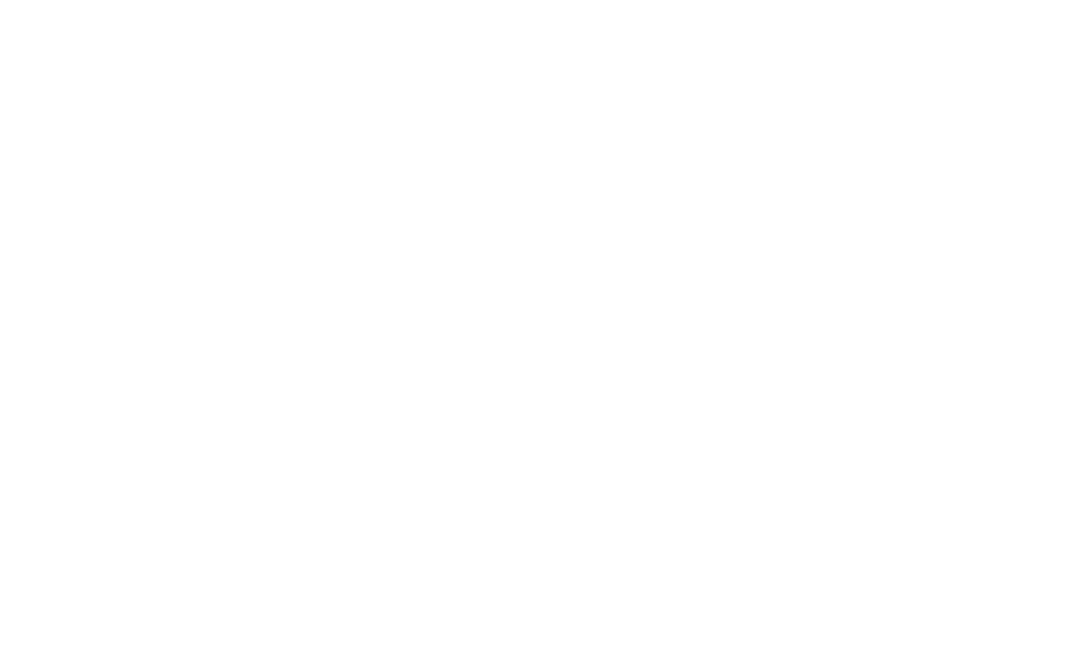

<IPython.core.display.Javascript object>


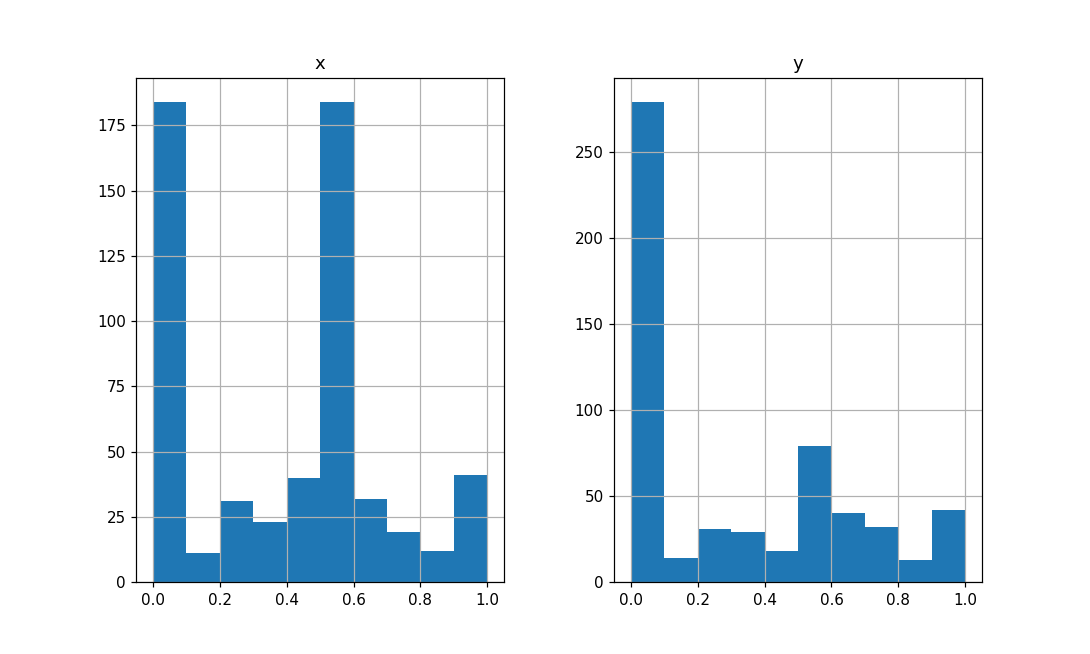

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22e03f6f28>,
      dtype=object)

In [72]:
plt.figure()
tp.subpx_bias(f)

In [74]:
f = tp.batch(frames, 15, minmass=1000, percentile=0.95)

Frame 3: 781 features


In [75]:
t = tp.link_df(f, 10, memory=0)

Frame 3: 781 trajectories present.


In [76]:
t.head(10)

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,8.014915,266.518446,4200.956813,1.462872,0.301526,616.691345,4996.0,0.000041,0,0
561,629.572106,518.185650,8657.478680,1.997748,0.114054,1114.221538,9993.0,0.000021,0,1
562,631.000000,964.500000,5781.501598,1.433310,0.301535,823.685276,6670.0,0.000031,0,2
563,632.000000,10.000000,2941.912381,1.275975,0.213163,516.918165,3336.0,0.000062,0,3
564,632.500000,240.000000,2960.733690,1.432300,0.030907,422.204478,3420.0,0.000060,0,4
565,632.616309,538.899151,7956.435487,3.360831,0.512404,556.382202,11901.0,0.000017,0,5
566,633.906293,618.581003,11826.096773,1.997174,0.253284,1038.491063,15417.0,0.000013,0,6
567,632.501035,691.500318,5475.989241,2.082774,0.405040,505.665855,6670.0,0.000031,0,7
568,635.445950,746.742760,14315.731056,2.430925,0.241905,975.308129,20624.0,0.000010,0,8
569,634.874383,982.950832,2910.907814,1.653611,0.199838,517.403877,3339.0,0.000062,0,9


In [77]:
t1 = tp.filter_stubs(t, 3)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 2403
After: 128


<IPython.core.display.Javascript object>


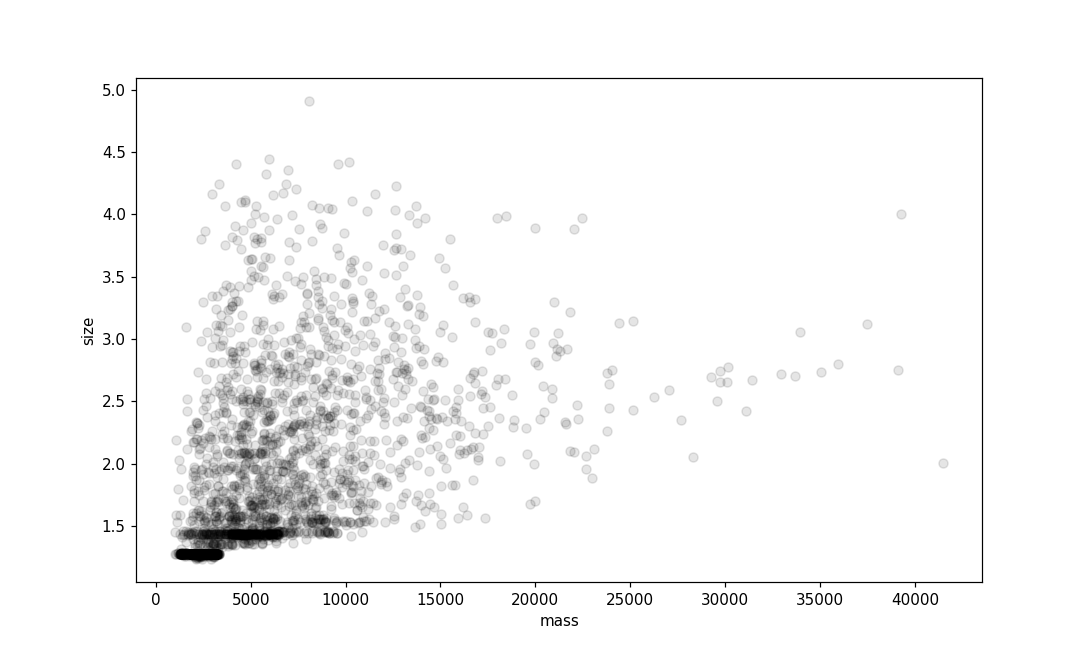

In [78]:
plt.figure()
tp.mass_size(t.groupby('particle').mean())  # convenience function -- just plots size vs. mass

<IPython.core.display.Javascript object>


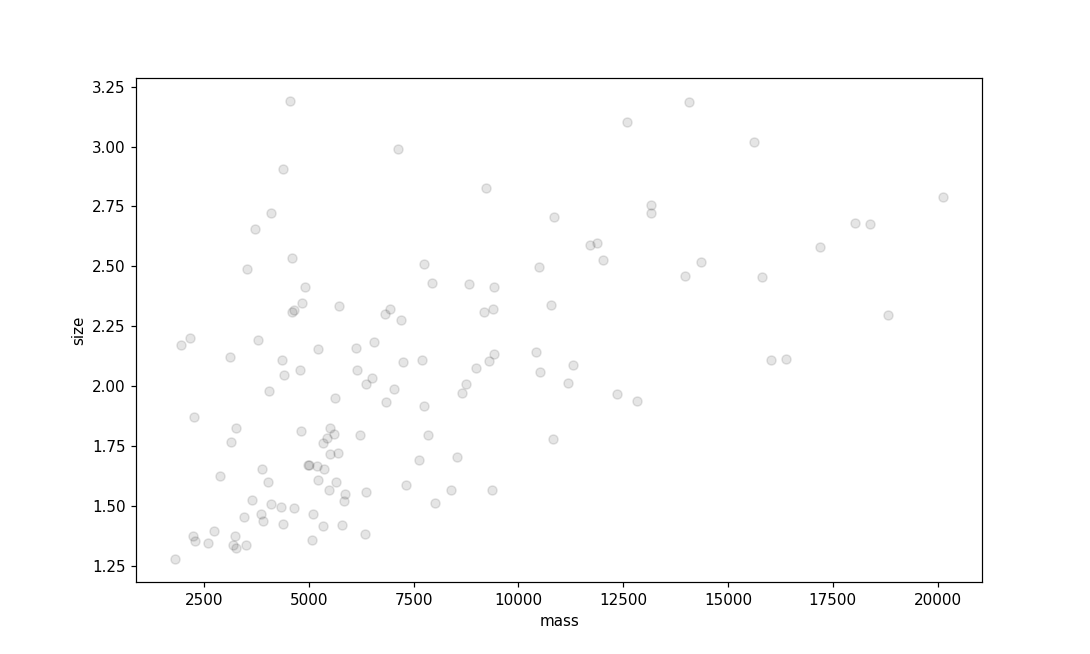

In [79]:
plt.figure()
tp.mass_size(t1.groupby('particle').mean())  # convenience function -- just plots size vs. mass

<IPython.core.display.Javascript object>


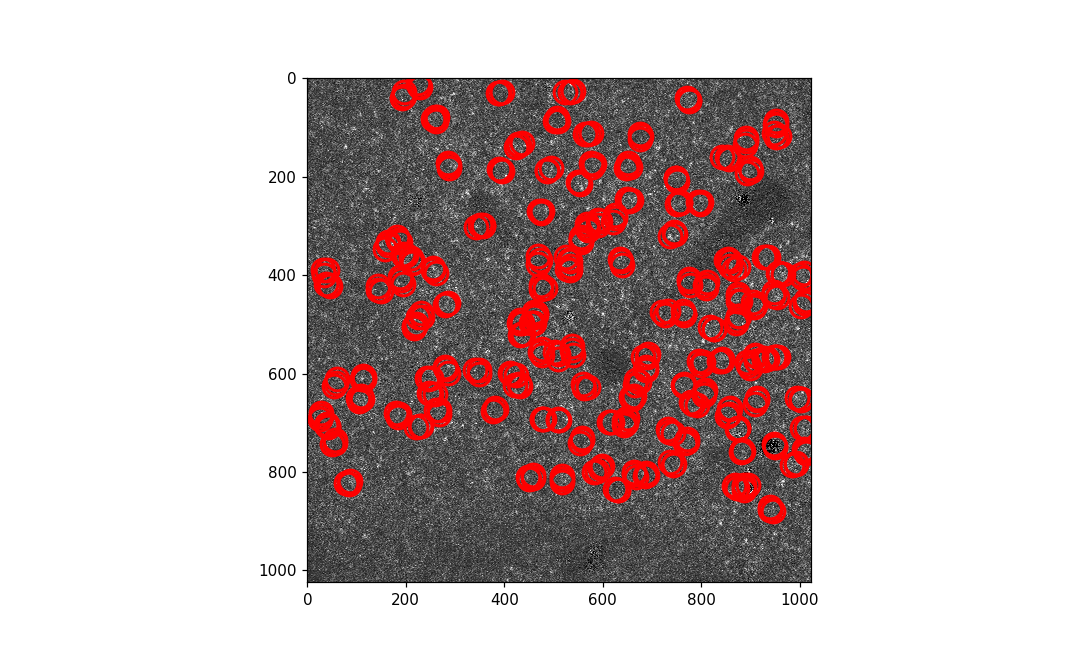

In [80]:
plt.figure()
tp.annotate(t1, background)

<IPython.core.display.Javascript object>


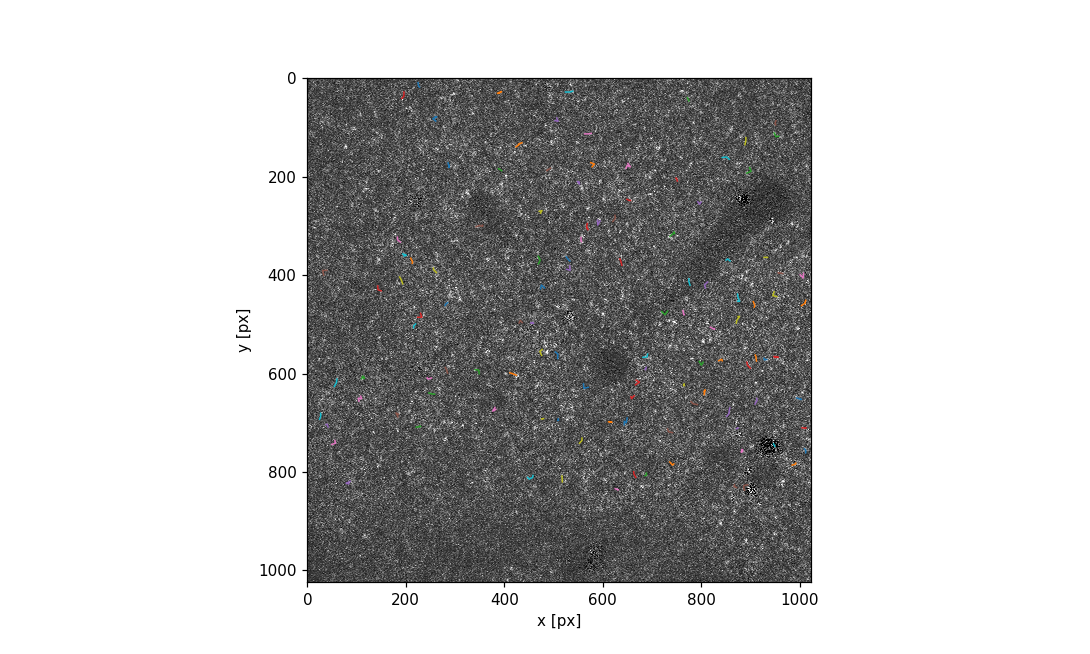

In [81]:
plt.figure()
tp.plot_traj(t1, superimpose=background)

<IPython.core.display.Javascript object>


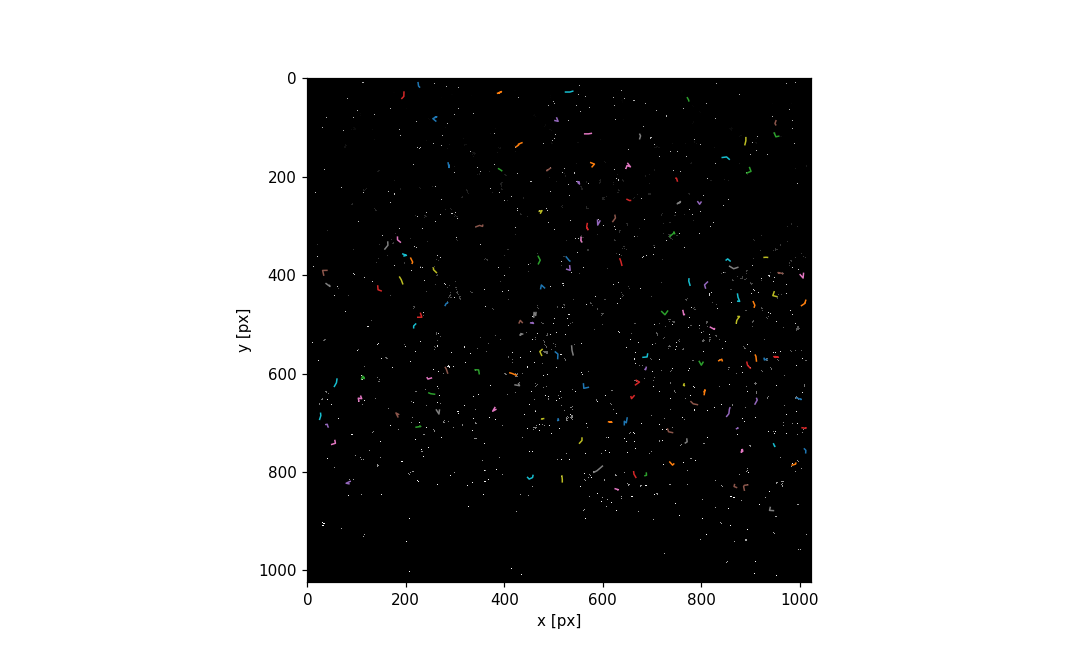

In [82]:
plt.figure()
tp.plot_traj(t1, superimpose=frames[0])

In [23]:
d = tp.compute_drift(t1)

/home/dli/anaconda2/envs/lids/lib/python3.6/site-packages/trackpy/motion.py:289: FutureWarning: 'frame' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  dx = f_diff.loc[mask, pos_columns + ['frame']].groupby('frame').mean()


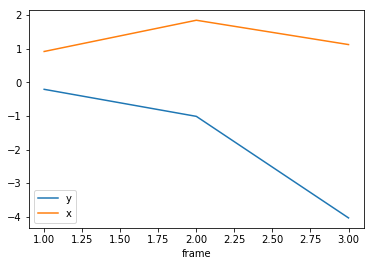

In [24]:
d.plot()

In [25]:
tm = tp.subtract_drift(t1, d)

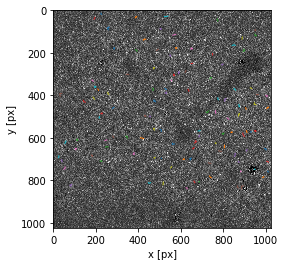

In [26]:
plt.figure()
tp.plot_traj(tm, superimpose=background)

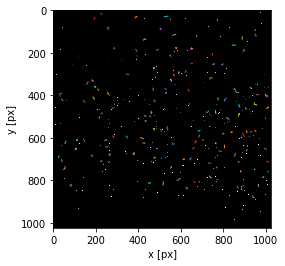

In [27]:
plt.figure()
tp.plot_traj(tm, superimpose=frames[0])

In [28]:
im = tp.imsd(tm, 0.09, 1)  # microns per pixel = 0.09., frames per second = 24

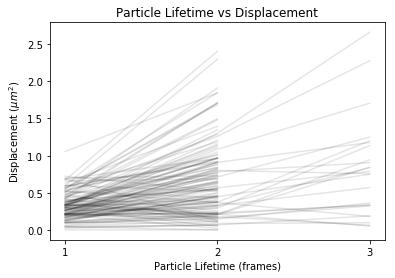

In [29]:
fig, ax = plt.subplots()
ax.plot(im.index, im, 'k-', alpha=0.1)  # black lines, semitransparent
ax.set(title='Particle Lifetime vs Displacement',
       ylabel=r'Displacement $(\mu m^2)$',
       xlabel='Particle Lifetime (frames)')
ax.set_xticks(np.arange(1, 4, 1.0))
